# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Read Dataset

In [2]:
## for Colab
# from google.colab import files
# uploaded = files.upload()

In [3]:
train_df = pd.read_csv('../Titanic_Disaster/DataSet/train.csv', index_col='PassengerId')
print(train_df.shape)
train_df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df = pd.read_csv('../Titanic_Disaster/DataSet/test.csv', index_col='PassengerId')
print(test_df.shape)
test_df.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 2. Preprocessing(전처리)

In [8]:
train_df.loc[train_df['Sex'] == 'female', 'Sex'] = 0
train_df.loc[train_df['Sex'] == 'male', 'Sex'] = 1
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
test_df.loc[test_df['Sex'] == 'female', 'Sex'] = 0
test_df.loc[test_df['Sex'] == 'male', 'Sex'] = 1
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [10]:
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [11]:
test_df[test_df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S


In [12]:
mean_third_fare = train_df[train_df['Pclass'] == 3]['Fare'].mean()
print(mean_third_fare)

13.675550101832997


In [13]:
test_df.loc[test_df['Fare'].isnull(), 'Fare'] = mean_third_fare

In [14]:
test_df[test_df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [15]:
mean_age = train_df[train_df['Age'].notnull()].Age.mean()
mean_age

29.69911764705882

In [16]:
train_df.loc[train_df['Age'].isnull(), 'Age'] = mean_age
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [17]:
train_df[train_df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [18]:
test_df.loc[test_df.Age.isnull(), 'Age'] = mean_age

## One hot encoding

In [19]:
'''
C == [1, 0, 0]
S == [0, 1, 0]
Q == [0, 0, 1]

C == [True, False, False]
S == [False, True, False]
Q == [False, False, True]
'''

'\nC == [1, 0, 0]\nS == [0, 1, 0]\nQ == [0, 0, 1]\n\nC == [True, False, False]\nS == [False, True, False]\nQ == [False, False, True]\n'

In [20]:
train_df['Embarked_C'] = train_df['Embarked'] == 'C'
train_df['Embarked_S'] = train_df['Embarked'] == 'S'
train_df['Embarked_Q'] = train_df['Embarked'] == 'Q'
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,True,False,False
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,False,True,False
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,False,True,False
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,False,True,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,False,True,False


In [21]:
test_df['Embarked_C'] = test_df['Embarked'] == 'C'
test_df['Embarked_S'] = test_df['Embarked'] == 'S'
test_df['Embarked_Q'] = test_df['Embarked'] == 'Q'
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S,False,True,False
894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q,False,False,True
895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S,False,True,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,29.699118,0,0,A.5. 3236,8.0500,NaN,S,False,True,False
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,True,False,False
1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True,False


In [22]:
train_df['Pclass_1'] = train_df['Pclass'] == 1
train_df['Pclass_2'] = train_df['Pclass'] == 2
train_df['Pclass_3'] = train_df['Pclass'] == 3
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,False,True,False,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,True,False,False,True,False,False
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,False,True,False,True,False,False
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,False,True,False,False,True,False
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,False,True,False,True,False,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,False,True,False,False,False,True


In [23]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
test_df['Pclass_1'] = test_df['Pclass'] == 1
test_df['Pclass_2'] = test_df['Pclass'] == 2
test_df['Pclass_3'] = test_df['Pclass'] == 3
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q,False,False,True,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S,False,True,False,False,False,True
894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q,False,False,True,False,True,False
895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S,False,True,False,False,False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,29.699118,0,0,A.5. 3236,8.0500,NaN,S,False,True,False,False,False,True
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,True,False,False,True,False,False
1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,True,False,False,False,True


# Train

In [25]:
feature_names = ['Sex', 'Age', 'SibSp', 'Parch', 
       'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q',
       'Pclass_1', 'Pclass_2', 'Pclass_3']

In [26]:
# train_df.columns
feature_names

['Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [98]:
x_train = train_df[feature_names]
print(x_train.shape)
x_train.head()

(891, 11)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,1,22.0,1,0,7.2500,False,True,False,False,False,True
2,0,38.0,1,0,71.2833,True,False,False,True,False,False
3,0,26.0,0,0,7.9250,False,True,False,False,False,True
4,0,35.0,1,0,53.1000,False,True,False,True,False,False
5,1,35.0,0,0,8.0500,False,True,False,False,False,True


In [99]:
x_test = test_df[feature_names]
print(x_test.shape)
x_test.head()

(418, 11)


,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
892,1,34.5,0,0,7.8292,False,False,True,False,False,True
893,0,47.0,1,0,7.0000,False,True,False,False,False,True
894,1,62.0,0,0,9.6875,False,False,True,False,True,False
895,1,27.0,0,0,8.6625,False,True,False,False,False,True
896,0,22.0,1,1,12.2875,False,True,False,False,False,True


In [100]:
y_train = train_df['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [102]:
# model = DecisionTreeClassifier(max_depth=5)
# model

In [103]:
model = RandomForestClassifier(max_depth=100,
                      max_features=0.8,
                      n_estimators=500,
                      random_state=42)

model

RandomForestClassifier(max_depth=100, max_features=0.8, n_estimators=500,
                       random_state=42)

In [104]:
# help(DecisionTreeClassifier)

In [105]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, max_features=0.8, n_estimators=500,
                       random_state=42)

In [106]:
prediction = model.predict(x_test)
print(prediction.shape)

(418,)


# Feature Importance

In [40]:
importances = model.feature_importances_
importances

array([0.29127558, 0.25357651, 0.04392216, 0.02670311, 0.24719622,
       0.01172791, 0.01624621, 0.00642168, 0.02118607, 0.01008578,
       0.07165878])

In [43]:
indices = np.argsort(importances)[::-1]
indices

array([ 0,  1,  4, 10,  2,  3,  8,  6,  5,  9,  7])

In [45]:
importance_names = [feature_names[i] for i in indices]
importance_names

['Sex',
 'Age',
 'Fare',
 'Pclass_3',
 'SibSp',
 'Parch',
 'Pclass_1',
 'Embarked_S',
 'Embarked_C',
 'Pclass_2',
 'Embarked_Q']

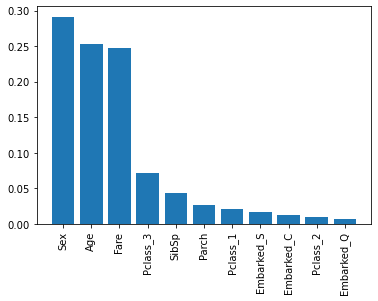

In [50]:
plt.figure()
plt.bar(range(len(importance_names)), importances[indices])
plt.xticks(range(len(importance_names)),importance_names, rotation=90)
plt.show()

In [116]:
# pick up proper features
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(max_depth=100,
                      max_features=0.8,
                      n_estimators=500,
                      random_state=42)

model

RandomForestClassifier(max_depth=100, max_features=0.8, n_estimators=500,
                       random_state=42)

In [117]:
selector = SelectFromModel(model, threshold=0.1)
selector

SelectFromModel(estimator=RandomForestClassifier(max_depth=100,
                                                 max_features=0.8,
                                                 n_estimators=500,
                                                 random_state=42),
                threshold=0.1)

In [119]:
features_important = selector.fit_transform(train_df[feature_names], train_df['Survived'])
features_important

array([[1, 22.0, 7.25],
       [0, 38.0, 71.2833],
       [0, 26.0, 7.925],
       ...,
       [0, 29.69911764705882, 23.45],
       [1, 26.0, 30.0],
       [1, 32.0, 7.75]], dtype=object)

In [120]:
model.fit(features_important, y_train)

RandomForestClassifier(max_depth=100, max_features=0.8, n_estimators=500,
                       random_state=42)

In [121]:
proper_features = train_df[feature_names].columns[selector.get_support()]
proper_features

Index(['Sex', 'Age', 'Fare'], dtype='object')

# Validation

In [122]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(model.predict(x_train), y_train)) # features_important

Accuracy:  0.9797979797979798


In [123]:
from sklearn.metrics import mean_squared_error
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train)) # features_important

MSE(Training data) :  0.020202020202020204


# Submit

In [124]:
prediction = model.predict(x_test[proper_features]) # proper_features
print(prediction.shape)

(418,)


In [125]:
submit = pd.read_csv('../Titanic_Disaster/DataSet/gender_submission.csv', index_col='PassengerId')
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [126]:
submit['Survived'] = prediction
submit

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [127]:
submit.to_csv('submit.csv')

In [128]:
submit

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0


# Plus. Boosting Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier